In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

# Data Description:
Hotel (H1 = Resort Hotel or H2 = City Hotel)<br>
is_canceled: Value indicating if the booking was canceled (1) or not (0)<br>
lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date<br>
arrival_date_year: Year of arrival date<br>
arrival_date_month: Month of arrival date<br>
arrival_date_week_number: Week number of year for arrival date<br>
arrival_date_day_of_month: Day of arrival date<br>
stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel<br>
stays_in_weekdays_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel<br>
adults: Number of adults<br>
booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation<br>
deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.<br>
agent: ID of the travel agency that made the booking<br>
Company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons<br>
days_in_waiting_list: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons<br>
customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking<br>
Adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights<br>
required_car_parking_spaces: Number of car parking spaces required by the customer<br>
total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)<br>
reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why<br>



In [2]:
dff = pd.read_csv('hotel_bookings_data.csv')
dff.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
dff.shape

(119390, 29)

# Exploratory Data Analysis

## 1. Descriptive Statistics

In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 1.1. Checking Null Value & Duplicate Value

In [5]:
dff.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

Found that there are missing values in the column:
- Company
- Agent
- City
- Children

In [6]:
# filling null values with zero
nan_value = {'children' : 0,
             'city' : 'unknwon',
             'agent' : 0,
             'company' :0}
df = dff.fillna(nan_value)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Imputation is performed on columns that have missing values

In [8]:
df.duplicated().sum()

33261

In [64]:
df[df.duplicated(keep=False) == True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out,2
21,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,No Deposit,250,0,0,Personal,84.67,0,1,Check-Out,2
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,No Deposit,250,0,0,Personal,84.67,0,1,Check-Out,2
39,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,No Deposit,250,0,0,Personal,137.00,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2019,October,35,31,0,3,3,...,No Deposit,9,0,0,Family,195.33,0,2,Check-Out,3
119353,City Hotel,0,63,2019,October,35,31,0,3,3,...,No Deposit,9,0,0,Family,195.33,0,2,Check-Out,3
119354,City Hotel,0,63,2019,October,35,31,0,3,3,...,No Deposit,9,0,0,Family,195.33,0,2,Check-Out,3
119372,City Hotel,0,175,2019,October,35,31,1,3,1,...,No Deposit,42,0,0,Personal,82.35,0,1,Check-Out,1


#### Removing duplicate data, the processing result is False which means there are no duplicate data

In [18]:
df_pr = df.drop_duplicates()
df_pr.duplicated().any()

False

In [19]:
df_pr.duplicated().sum()

0

### 1.2. Check Nunique Value

In [9]:
print(tabulate({"Column Name":df.nunique().index.tolist(),
               "Unique Values":df.nunique().tolist(),
               "Missing Values":df.isnull().sum().tolist()},headers="keys",tablefmt="grid"))

+--------------------------------+-----------------+------------------+
| Column Name                    |   Unique Values |   Missing Values |
+================================+=================+==================+
| hotel                          |               2 |                0 |
+--------------------------------+-----------------+------------------+
| is_canceled                    |               2 |                0 |
+--------------------------------+-----------------+------------------+
| lead_time                      |             479 |                0 |
+--------------------------------+-----------------+------------------+
| arrival_date_year              |               3 |                0 |
+--------------------------------+-----------------+------------------+
| arrival_date_month             |              12 |                0 |
+--------------------------------+-----------------+------------------+
| arrival_date_week_number       |              53 |            

## Task 1
### Data Preprocessing : Mengisi atau menghapus data NULL

In [10]:
#See a value from meal dataset
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

There is an "undefined" value in the column, so it is necessary to clarify about the value category

In [11]:
df['meal'].replace('Undefined','No Meal',inplace=True)

In [12]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Create New  Column "guest" from columns adults, children, babies

In [13]:
df['guest'] = df['adults']+df['children']+df['babies']
df['guest'].value_counts()

2.0     82051
1.0     22581
3.0     10495
4.0      3929
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: guest, dtype: int64

In [14]:
#Remove 0 value because there's no exist
df_aft = df[df["guest"]>0].copy()
print('Before a Remove: ', df.shape[0])
print('After a Remove: ', df_aft.shape[0])

Before a Remove:  119390
After a Remove:  119210


In [15]:
#Check value, after remove 0 value
df_aft['guest'].value_counts()

2.0     82051
1.0     22581
3.0     10495
4.0      3929
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: guest, dtype: int64

## Task 2 
### Analysis The Hotel Booking per Month Based by Hotel Type
Create Data Comparisons

In [20]:
df1 = df_aft.copy()
df1 =  df1.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df1
# Change columns name
df1.columns = ['hotel_type','month','unique_year','total_booking']
df1

,hotel_type,month,unique_year,total_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


There are differences in the number of years recorded in some data, so it is necessary to divide the number of orders by the number of years to get the average monthly orders.

In [21]:
df1['average_booking'] = round(df1['total_booking']/df1['unique_year'])
df1

,hotel_type,month,unique_year,total_booking,average_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


### Sort data by month

In [22]:
month_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1['month'] = df1['month']
df1['month'] = pd.Categorical(df1['month'], categories=month_order, ordered=True)
df1

,hotel_type,month,unique_year,total_booking,average_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


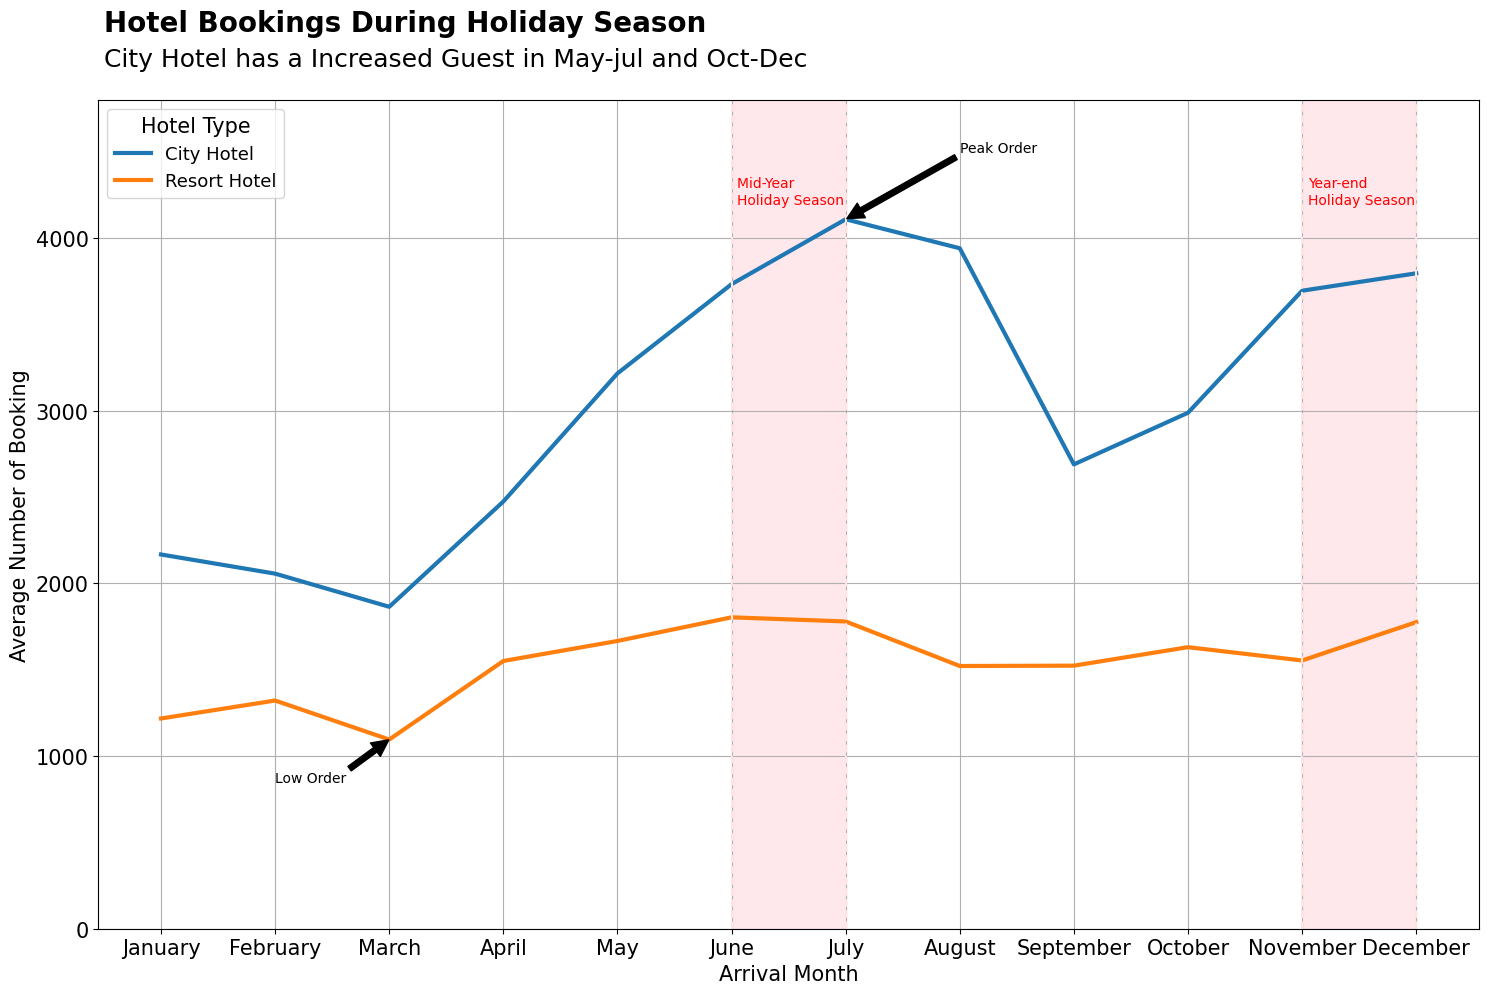

In [79]:
#set a figure size
plt.figure(figsize=(15,10))
#set a new lineplot
axt = sns.lineplot(x='month',y='average_booking',hue='hotel_type',
             size='hotel_type',sizes=(3, 3), data=df1)

#Increase size x-y axis label
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid() #Make a gridline
#Set a title and font size on legend
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

#set a title on a x/y axis
plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15)
plt.ylim(0, 4800) #limit a y axis

#set a vertical line for highlighting insights
plt.axvline(5, ls='--', color='mistyrose')
plt.axvline(6, ls='--', color='mistyrose')
#set a text between vertical line
plt.text(x=5.05, y=4200, s='Mid-Year \nHoliday Season', fontsize=10, color='red')
#set a block of color to the highlighted area
plt.stackplot(np.arange(5,7,1), [[4800]], color='lightpink', alpha=0.3)

plt.axvline(10, ls='--', color='mistyrose')
plt.axvline(11, ls='--', color='mistyrose')
plt.text(x=10.05, y=4200, s='Year-end \nHoliday Season', fontsize=10, color='red')
plt.stackplot(np.arange(10,12,1), [[4800]], color='lightpink', alpha=0.3)

#set a title for a visualization data
plt.text(x=-0.5, y=5200, s='Hotel Bookings During Holiday Season',
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=5000, s='City Hotel has a Increased Guest in May-jul and Oct-Dec',
         fontsize=18)
plt.annotate('Peak Order', xy=('July', 4110), xytext=('August', 4500),
            arrowprops=dict(facecolor='k', shrink=0.01),
            )
plt.annotate('Low Order', xy=('March', 1096), xytext=('February', 850),
            arrowprops=dict(facecolor='k', shrink=0.01),
            )

#set a layour for a visualization so as not to cut
plt.tight_layout()
#save a picture
plt.savefig('Investigate hotel business DA1.png', dpi=1000);

### Interpretation
1. There is always an increase in the holiday season
2. In March both types of hotels have the least number of bookings
3. The highest number of orders occurs in the mid-year holiday season
4. A significant increase in the number of orders occurred from March to June
5. Overall, city hotel orders outnumber resort hotels

## Task 3
### Analyzing: Correlation Between Order Duration Stay and Cancellation

In [80]:
# Copy preprocessing data
df2 = df_aft.copy()
#Create column total night, aggregration to get a duration stay based on hotel type
df2['total_nights'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']

<AxesSubplot:xlabel='total_nights', ylabel='count'>

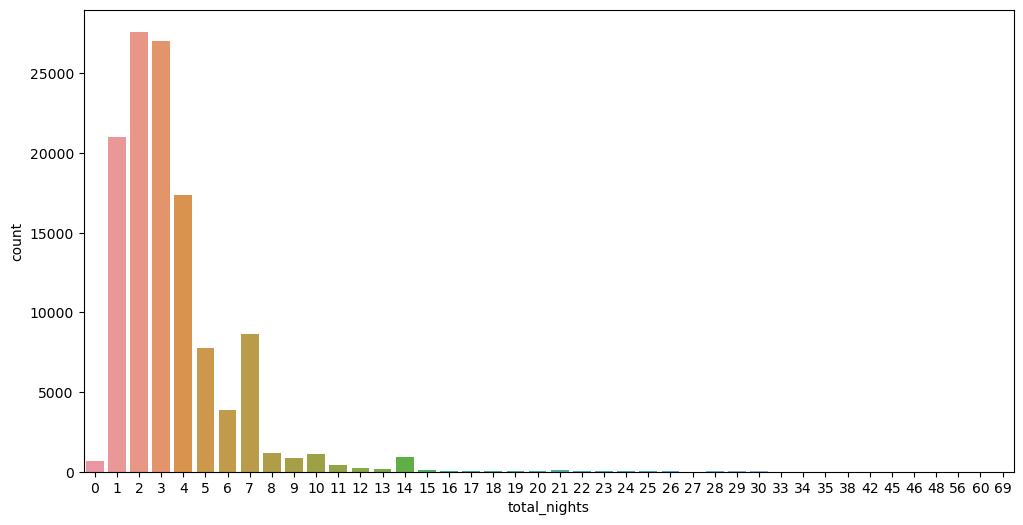

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(x='total_nights', data=df2)

In [90]:
# Group values to make them more significant and consider the distribution of data
df2['group_total_nights'] = np.where(df2['total_nights'] > 21, 21, 
                                       np.where(df2['total_nights'] > 14, 15, df2['total_nights']))

<AxesSubplot:xlabel='group_total_nights', ylabel='count'>

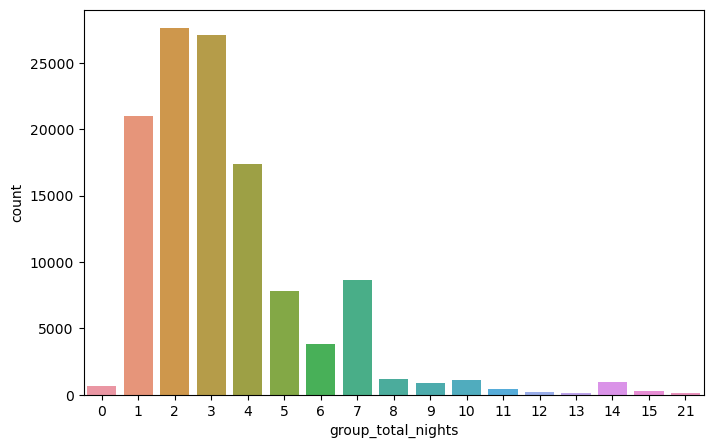

In [95]:
plt.figure(figsize=(8,5))
sns.countplot(x='group_total_nights', data=df2)

In [113]:
# an aggregate table showing the ratio of the number of canceled hotel bookings to the duration of stay for each type of hotel
df_can = df2.groupby(['hotel', 'group_total_nights'])['is_canceled'].agg(['sum','count']).reset_index()
df_can.columns = ['hotel_type', 'total_stay_nights', 'cancel_booking', 'total_booking'] #rename column
df_can

,hotel_type,total_stay_nights,cancel_booking,total_booking
0,City Hotel,0,13,264
1,City Hotel,1,4103,13258
2,City Hotel,2,10432,21415
3,City Hotel,3,9482,21371
4,City Hotel,4,4853,12547
5,City Hotel,5,1775,4985
6,City Hotel,6,938,2049
7,City Hotel,7,808,2053
8,City Hotel,8,176,381
9,City Hotel,9,93,212


In [114]:
#add percentage column
df_can['percent_canceled'] = round(df_can['cancel_booking']*100.0/df_can['total_booking'], 2)
df_can

,hotel_type,total_stay_nights,cancel_booking,total_booking,percent_canceled
0,City Hotel,0,13,264,4.92
1,City Hotel,1,4103,13258,30.95
2,City Hotel,2,10432,21415,48.71
3,City Hotel,3,9482,21371,44.37
4,City Hotel,4,4853,12547,38.68
5,City Hotel,5,1775,4985,35.61
6,City Hotel,6,938,2049,45.78
7,City Hotel,7,808,2053,39.36
8,City Hotel,8,176,381,46.19
9,City Hotel,9,93,212,43.87


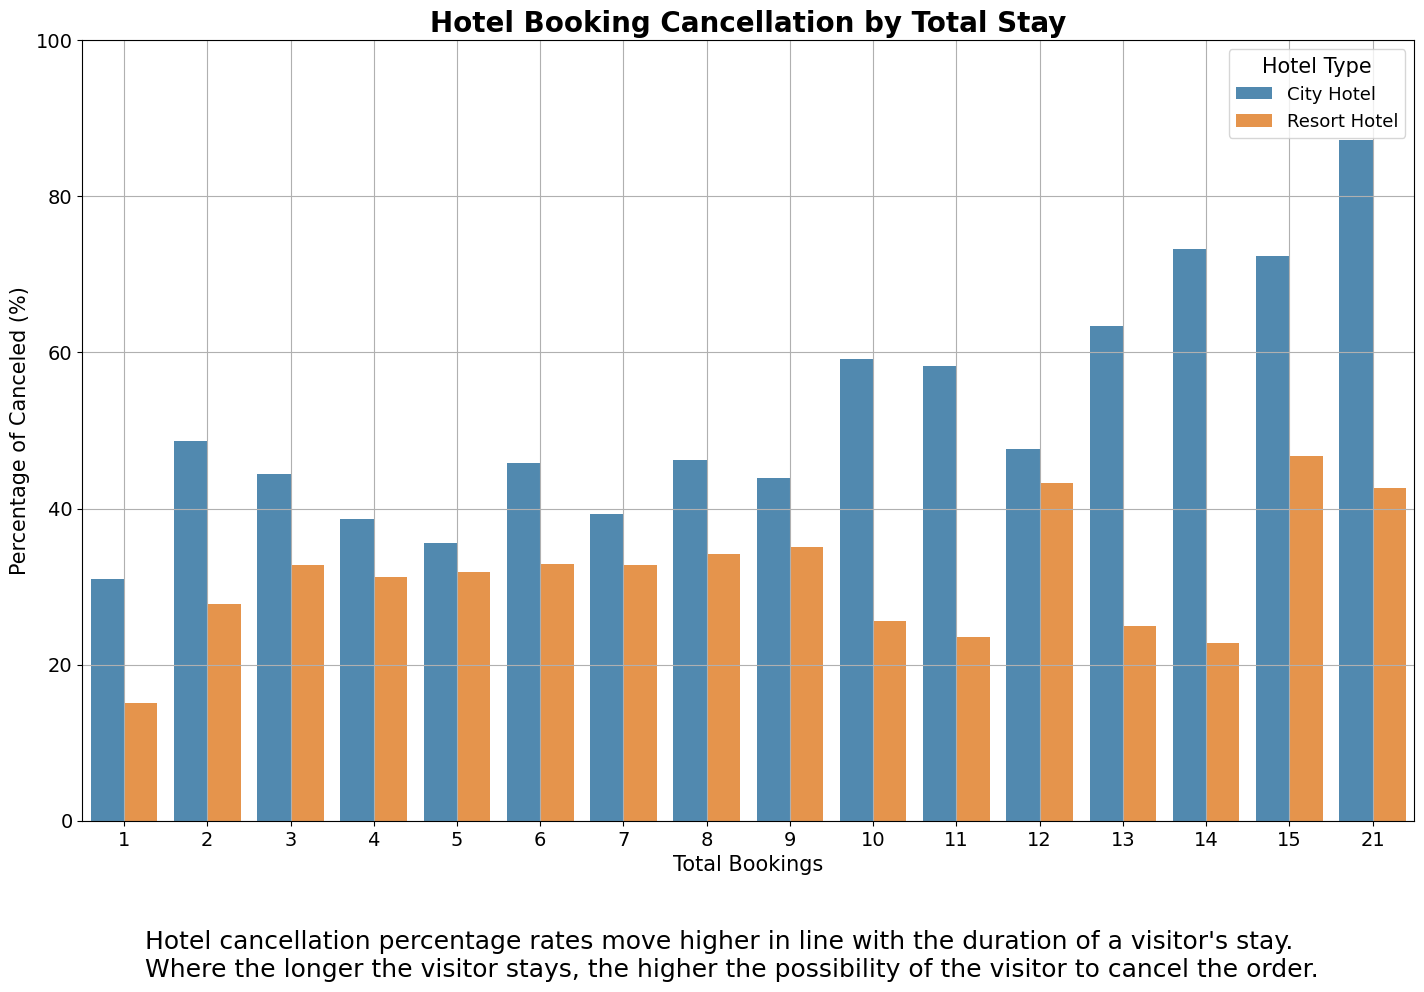

In [207]:
plt.figure(figsize = (15,10))
sns.barplot(x='total_stay_nights', y='percent_canceled', hue='hotel_type', data=df_can, alpha=0.85)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

plt.xlabel('Total Bookings', fontsize=15) 
plt.ylabel('Percentage of Canceled (%)', fontsize=15)
plt.ylim(0, 100) # membatasi y axis
plt.xlim(0.5, 16.5) # membatasi x axis

plt.title('Hotel Booking Cancellation by Total Stay', fontsize=20, fontweight='bold')
plt.text(x=1.25, y=-20, s="Hotel cancellation percentage rates move higher in line with the duration of a visitor's stay. \nWhere the longer the visitor stays, the higher the possibility of the visitor to cancel the order.", 
         fontsize=18)

plt.tight_layout()
plt.savefig("Hotel Cancellation Trends.png")

### Interpretation
1. The higher the number of visitors ordering a stay for a long duration of time, the higher the order cancellation rate.
2. Both types of hotels, City and Resort Hotels, have the highest order cancellation rates when visitors plan to stay for more than two weeks.

## Task 4 
### Analyzing: Impact of Lead Time to Hotel Booking Cancelation

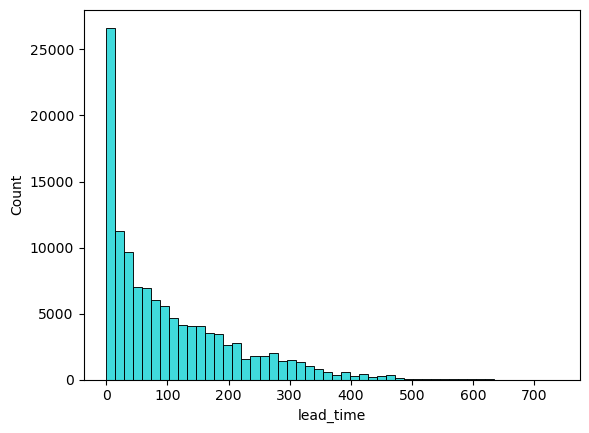

In [134]:
df3 = df_aft.copy()
sns.histplot(data=df3, x="lead_time", bins=50, color="darkturquoise");

In [136]:
def group(x):
    if x['lead_time'] <= 30:
        group = 30
    elif x['lead_time'] >= 31 and x['lead_time'] <= 120:
        group = 120
    elif x['lead_time'] >= 121 and x['lead_time'] <= 210:
        group = 210
    elif x['lead_time'] >= 211 and x['lead_time'] <= 300:
        group = 300
    elif x['lead_time'] >= 301 and x['lead_time'] <= 360:
        group = 360
    else:
        group = 361
    return group

df3['lead_time_group'] = df3.apply(lambda x: group(x), axis=1)
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,lead_time_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,360
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,361
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,30
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,30
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,30


In [155]:
lead_time_cancel = df3.groupby(['hotel', 'is_canceled', 'lead_time_group'])['hotel'].count().reset_index(name='total_bookings')
df3_ca = lead_time_cancel.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='total_bookings').reset_index()
df3_ca['total_nocancel_or_cancel'] = df3_ca[0]+df3_ca[1] #total is_canceled is obtained via df0 + 1
df3_ca['cancellation_rate'] = round(df3_ca[1]*100.0/(df3_ca['total_nocancel_or_cancel']), 2) 
df3_ca.columns = ['hotel_type', 'lead_time_group', 'no_cancel', 'cancel', 'total_is_cancelled', 'cancellation_rate'] #rename column
df3_ca

,hotel_type,lead_time_group,no_cancel,cancel,total_is_cancelled,cancellation_rate
0,City Hotel,30,18060,5184,23244,22.30
1,City Hotel,120,16432,11786,28218,41.77
2,City Hotel,210,7306,7051,14357,49.11
3,City Hotel,300,2764,4376,7140,61.29
4,City Hotel,360,732,2608,3340,78.08
5,City Hotel,361,790,2074,2864,72.42
6,Resort Hotel,30,13352,1984,15336,12.94
7,Resort Hotel,120,7740,4000,11740,34.07
8,Resort Hotel,210,4607,2686,7293,36.83
9,Resort Hotel,300,2274,1723,3997,43.11


Categorize values according to month:
1. 30 : Within a Month
2. 120: 2-4 Months
3. 210: 5-7 Months
4. 300: 8-10 Months
5. 360: 10-12 Months
6. 361: >12 Months

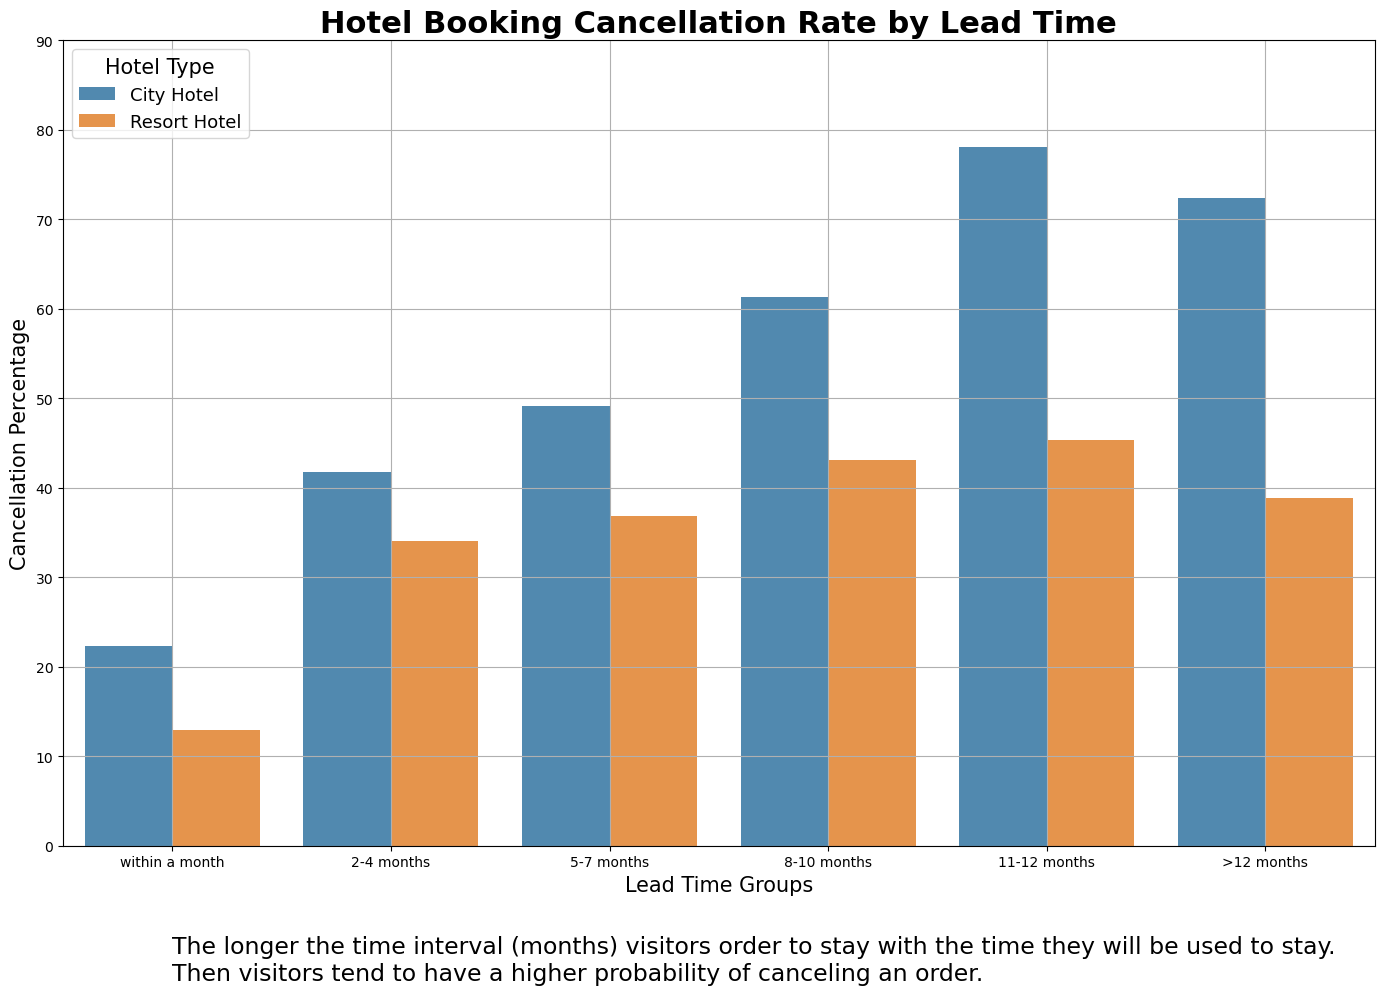

In [209]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='cancellation_rate', hue='hotel_type', data=df3_ca, alpha=0.85) 
plt.grid()

plt.title('Hotel Booking Cancellation Rate by Lead Time', fontsize=22, fontweight='bold')
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc='upper left')
plt.text(x=0, y=-15, s='The longer the time interval (months) visitors order to stay with the time they will be used to stay. \nThen visitors tend to have a higher probability of canceling an order.',fontsize=17)
plt.xticks(range(0,6,1), labels=['within a month', '2-4 months', '5-7 months', '8-10 months', '11-12 months', '>12 months'])

plt.xlabel('Lead Time Groups', fontsize=15)
plt.ylabel('Cancellation Percentage', fontsize=15)
plt.ylim(0, 90) # membatasi y axis
plt.xlim(-0.5, 5.5) # membatasi x axis

plt.tight_layout()
plt.savefig("Hotel Cancellation Rate by Lead Time.png")

### Interpretation
1. Visitors who make bookings for 11-12 months tend to have a high chance of cancellation. The range is 78% for City Hotels and 45.4% for Resort Hotels.
2. Interestingly, unlike the total stay variable, the highest number does not represent the peak of cancellations.